##### Name : Parvez Golam 
##### ID: 120224027
##### CS6421- Assignment 1

## Learning CNNs using Fashion-MNIST

This assignment will bulld CNNS using the Fashion-MINST dataset. In particular, we will
*   Use MNIST Fashion to study CNN architectures and parameters.

Read more about the Fashion-MINST dataset in this paper [here](https://arxiv.org/abs/1708.07747) (**Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms**)

## Assignment Overview


This assignment focuses on how to classify **fashion_mnist** data with a simple **Convolutional Neural Network** in Keras. 
Keras is part of the core TensorFlow library, in addition to being an independent open source project. 

The [fashion_mnist](https://github.com/zalandoresearch/fashion-mnist) dataset consists of 
60,000 train and 10,000 test instances. The aim is to classify an image into one of 10 categories. The possible categories/labals are:

<br> **Label**	**Description**
<br> 0 T-shirt/top
<br> 1 Trouser
<br> 2 Pullover
<br> 3 Dress
<br> 4 Coat
<br> 5 Sandal
<br> 6 Shirt
<br> 7 Sneaker
<br> 8 Bag
<br> 9 Ankle boot

Each gray-scale input is a 28x28 low-resolution image.

>>[Learning CNNs using Fashion-MNIST](#scrollTo=XLMRPLVCFwEc)

>>[Notebook Overview](#scrollTo=Ixyte299ZZgk)

>>[Download the fashion_mnist data](#scrollTo=LbCigZtNZZgl)

>>[Visualize the data](#scrollTo=tWORMSC8FDR4)

>>[Data normalization](#scrollTo=Zx-Ee6LHZZgt)

>>[Split the data into train/validation/test data sets](#scrollTo=CFlNHktHBtru)

>>[Create the basic model architecture](#scrollTo=HhalcO03ZZg3)

>>[Compile the model](#scrollTo=FhxJ5dinZZg8)

>>[Train the model](#scrollTo=DtOvh3YVZZg_)

>>[Load Model with the best validation accuracy](#scrollTo=e-MGLwZQy05d)

>>[Test Accuracy](#scrollTo=9RTRkan4yq5H)

>>[Visualize prediction](#scrollTo=oJv7XEk10bOv)

>>[Congragulations!](#scrollTo=8AehWdRAVKN5)



## Download the fashion_mnist data
First let's install TensorFlow version 1.8.0 and import Tensorflow. Then we download fashion-mnist which is one of the Keras datasets. 

In [1]:
#pip install -q -U tensorflow>=1.8.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from keras.callbacks import ModelCheckpoint

In [2]:
pip install h5py==2.8.0 

In [3]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


## Visualize the data

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


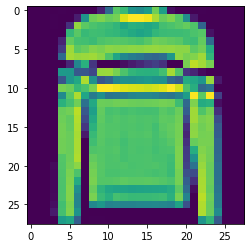

In [4]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

## Data normalization
Normalize the data dimensions so that they are of approximately the same scale.

In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


## Split the data into train/validation/test data sets


*   Training data - used for training the model
*   Validation data - used for tuning the hyperparameters and evaluate the models
*   Test data - used to test the model after the model has gone through initial vetting by the validation set.



In [7]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


## Create the basic model architecture

There are two APIs for defining a model in Keras:
1. [Sequential model API](https://keras.io/models/sequential/)
2. [Functional API](https://keras.io/models/model/)

In this assignment we are using the Sequential model API.

In defining the model we will be using some of these Keras APIs:
*   Conv2D() [link text](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D/) - create a convolutional layer 
*   Pooling() [link text](https://keras.io/layers/pooling/) - create a pooling layer 
*   Dropout() [link text](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) - apply drop out 

In the basic architecture we create two convolutional layers, and then an inference layer. 

The key parameters for a convolution layer are: 
for convolution--(a) number of convolution filters; (b) kernel size;
for pooling--kernel for pooling-size;
for dropout--dropout probability. We will refer to these as the convolution-layer parameters.

The inference-layer parameters are:
(a) hidden layer vector-size and activation;
(b) dropout probability;
(c) output-layer activation.

When we design a network we can specify the CNN model using these parameters.

We refer to a model using the parameter set [(64,2),(32,2), (0.3,0.3)], which refers to
[(convolution layer1 filters, convolution layer1 kernel size),
(convolution layer2 filters, convolution layer2 kernel size),
(convolution layer1 Dropout-probability, convolution layer2 Dropout-probability)].
Thus [(64,2),(32,2), (0.3,0.3)] is the parameter set for the baseline model.

In [8]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

## Compile the model
Configure the learning process with compile() API before training the model. It receives three arguments:

*   An optimizer 
*   A loss function 
*   A list of metrics 


In [9]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Train the model

Now let's train the model with fit() API.

We use  the [ModelCheckpoint](https://keras.io/callbacks/#modelcheckpoint) API to save the model after every epoch. Set "save_best_only = True" to save only when the validation accuracy improves.


In [10]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

start_time = datetime.now()

model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

# Duration of training
duration = datetime.now() - start_time
print("\n Duration:", duration)

Epoch 1/10
860/860 [==============================] - ETA: 0s - loss: 0.5900 - accuracy: 0.7851 ETA: 0s - loss: 0.5906 - accuracy: 
Epoch 00001: val_loss improved from inf to 0.36891, saving model to model.weights.best.hdf5
860/860 [==============================] - 78s 90ms/step - loss: 0.5900 - accuracy: 0.7851 - val_loss: 0.3689 - val_accuracy: 0.8686
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.4131 - accuracy: 0.8512
Epoch 00002: val_loss improved from 0.36891 to 0.32636, saving model to model.weights.best.hdf5
860/860 [==============================] - 76s 88ms/step - loss: 0.4134 - accuracy: 0.8511 - val_loss: 0.3264 - val_accuracy: 0.8824
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.3690 - accuracy: 0.8655
Epoch 00003: val_loss improved from 0.32636 to 0.29488, saving model to model.weights.best.hdf5
860/860 [==============================] - 79s 92ms/step - loss: 0.3692 - accuracy: 0.8654 - val_loss: 0.2949 - val_accuracy: 

## Load Model with the best validation accuracy

In [11]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

## Test Accuracy

In [12]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9122999906539917


## Visualize prediction
Now let's visualize the prediction using the model trained. 
First we get the predictions with the model from the test data.
Then we print out 15 images from the test data set, and set the titles with the prediction (and the groud truth label).
If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

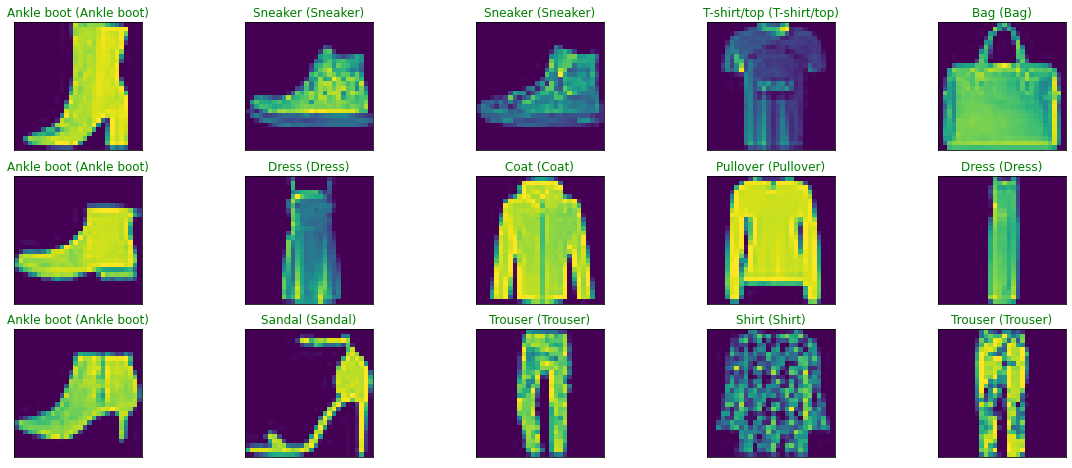

In [13]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

## Task 1: Architecture Comparison
The code given above is called the baseline architecture, and successfully train a CNN to classify fashion-MNIST with near 91% accuracy.
We now want to compare other different architectures.

We are running 11 additional architectures:


*   2 different combination of number of filters
*   2 different combinations of kernels for (convolution, pooling)
*   2 different dropout probability values
*   1 new architecture with more layers
*   4 experiments with combined changes

The results are given in a table with the first column describing the architecture, the second column the predictive accuracy of the model on the data and third column with the execution time to train each model.

A describtion for how the changes to architecture influence the change in accuracy, if there is any significant change, is given. Specifically, for:
* impact of number of filters
* impact of kernel size
* impact of dropout probability
* impact of number of layers
* impact of combining multiple changes.

As stated earlier we refer to a model using the parameter set [(64,2),(32,2), (0.3,0.3)], which refers to [(convolution layer1 filters, convolution layer1 kernel size), (convolution layer2 filters, convolution layer2 kernel size), (convolution layer1 Dropout-probability, convolution layer2 Dropout-probability)]. Thus [(64,2),(32,2), (0.3,0.3)] is the parameter set for the baseline model.

## Function definitions
We use below functions throughout the experiment.

In [8]:
# Function to add layers(convolution/pooling)
def add_layers(model, filters, kernel_size, pool_size, dropout_prob, layer):
    if layer == "first":
        # Must define the input shape in the first layer of the neural network
        model.add(tf.keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, padding='same', activation='relu', input_shape=(28,28,1))) 
        model.add(tf.keras.layers.MaxPooling2D(pool_size=pool_size))
        model.add(tf.keras.layers.Dropout(dropout_prob))
    else:
        model.add(tf.keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, padding='same', activation='relu'))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=pool_size))
        model.add(tf.keras.layers.Dropout(dropout_prob))

# Function to add layers (Dense)        
def add_dense_layer(model):
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Function for model compilation
def compile_model(model):
    model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Function for model Training
def train_model(model, checkpointer, x_train, y_train, x_valid, y_valid):
    model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

# Function for prediction    
def predict_data(model, x_test, y_test):
    y_hat = model.predict(x_test)

    # Plot a random sample of 10 test images, their predicted labels and ground truth
    figure = plt.figure(figsize=(20, 8))
    for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
        ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
        # Display each image
        ax.imshow(np.squeeze(x_test[index]))
        predict_index = np.argmax(y_hat[index])
        true_index = np.argmax(y_test[index])
        # Set the title for each image
        ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))


## With Filter Modification(32,32)
Filter modification (32,32) means that we run a model with parameter set [(32,2),(32,2), (0.3,0.3)].

In [15]:
model1 = tf.keras.Sequential()

# With filter combination 32, 32
add_layers(model1, 32, 2, 2, 0.3, "first")
add_layers(model1, 32, 2, 2, 0.3, "second")

add_dense_layer(model1)

# Take a look at the model summary
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        4128      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)             

#### Compile and Train

In [16]:
# Compile model
compile_model(model1)

checkpointer = ModelCheckpoint(filepath='model1.weights.best.hdf5', verbose = 1, save_best_only=True)

start_time = datetime.now()

# Train the model
train_model(model1, checkpointer, x_train, y_train, x_valid, y_valid)

# Duration of training
duration = datetime.now() - start_time
print("\n Duration:", duration)

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.6182 - accuracy: 0.7723
Epoch 00001: val_loss improved from inf to 0.39202, saving model to model1.weights.best.hdf5
860/860 [==============================] - 47s 55ms/step - loss: 0.6180 - accuracy: 0.7724 - val_loss: 0.3920 - val_accuracy: 0.8618
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.4312 - accuracy: 0.8416
Epoch 00002: val_loss improved from 0.39202 to 0.34398, saving model to model1.weights.best.hdf5
860/860 [==============================] - 47s 54ms/step - loss: 0.4312 - accuracy: 0.8416 - val_loss: 0.3440 - val_accuracy: 0.8764
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.3901 - accuracy: 0.8578
Epoch 00003: val_loss improved from 0.34398 to 0.30995, saving model to model1.weights.best.hdf5
860/860 [==============================] - 48s 56ms/step - loss: 0.3900 - accuracy: 0.8579 - val_loss: 0.3099 - val_accuracy: 0.8872
Epoch 4/10
859/860 [======

#### Test Accuracy

In [17]:
# Load the weights with the best validation accuracy
model1.load_weights('model1.weights.best.hdf5')

# Evaluate the model on test set
score = model1.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9032999873161316


#### Prediction

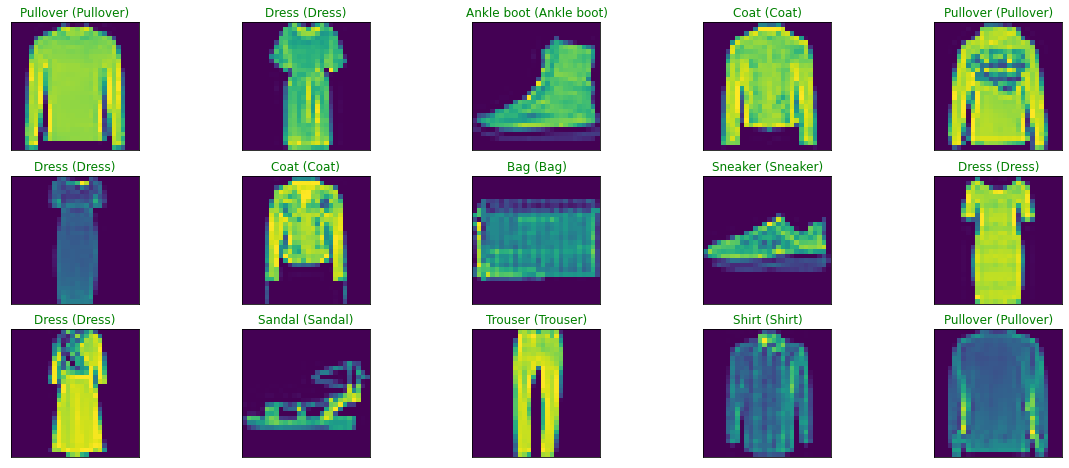

In [18]:
# Predict from trained model
predict_data(model1, x_test, y_test)


## WIth Filter Modification(32,16)
Filter modification (32,16) means that we run a model with parameter set [(32,2),(16,2), (0.3,0.3)].

In [19]:
model2 = tf.keras.Sequential()

# With filter combination 32, 16
add_layers(model2, 32, 2, 2, 0.3, "first")
add_layers(model2, 16, 2, 2, 0.3, "second")

add_dense_layer(model2)

# Take a look at the model summary
model2.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        2064      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)              

#### Compile and Train

In [20]:
# Compile model
compile_model(model2)

checkpointer = ModelCheckpoint(filepath='model2.weights.best.hdf5', verbose = 1, save_best_only=True)

start_time = datetime.now()

# Train the model
train_model(model2, checkpointer, x_train, y_train, x_valid, y_valid)

# Duration of training
duration = datetime.now() - start_time
print("\n Duration:", duration)

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.6733 - accuracy: 0.7466
Epoch 00001: val_loss improved from inf to 0.42361, saving model to model2.weights.best.hdf5
860/860 [==============================] - 38s 44ms/step - loss: 0.6733 - accuracy: 0.7466 - val_loss: 0.4236 - val_accuracy: 0.8564
Epoch 2/10
860/860 [==============================] - ETA: 0s - loss: 0.4642 - accuracy: 0.8286
Epoch 00002: val_loss improved from 0.42361 to 0.36351, saving model to model2.weights.best.hdf5
860/860 [==============================] - 39s 45ms/step - loss: 0.4642 - accuracy: 0.8286 - val_loss: 0.3635 - val_accuracy: 0.8710
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.4197 - accuracy: 0.8454
Epoch 00003: val_loss improved from 0.36351 to 0.33434, saving model to model2.weights.best.hdf5
860/860 [==============================] - 39s 45ms/step - loss: 0.4196 - accuracy: 0.8455 - val_loss: 0.3343 - val_accuracy: 0.8792
Epoch 4/10
860/860 [======

#### Test Accuracy

In [21]:
# Load the weights with the best validation accuracy
model2.load_weights('model2.weights.best.hdf5')

# Evaluate the model on test set
score = model2.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8966000080108643


#### Prediction

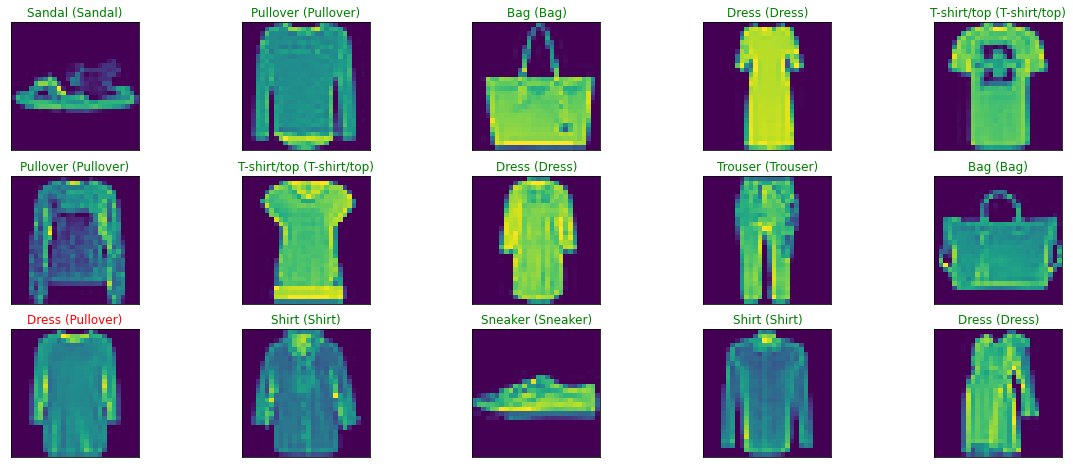

In [22]:
# Predict from trained model
predict_data(model2, x_test, y_test)


## WIth Kernel Modification(3,3)
Kernel Modification(3,3) means that we run a model with parameter set [(64,3),(32,3), (0.3,0.3)].

In [23]:
model3 = tf.keras.Sequential()

# With Kernel combination 3, 3
add_layers(model3, 64, 3, 2, 0.3, "first")
add_layers(model3, 32, 3, 2, 0.3, "second")

add_dense_layer(model3)

# Take a look at the model summary
model3.summary() 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)             

#### Compile and Train

In [24]:
# Compile model
compile_model(model3)

checkpointer = ModelCheckpoint(filepath='model3.weights.best.hdf5', verbose = 1, save_best_only=True)

start_time = datetime.now()

# Train the model
train_model(model3, checkpointer, x_train, y_train, x_valid, y_valid)

# Duration of training
duration = datetime.now() - start_time
print("\n Duration:", duration)

Epoch 1/10
860/860 [==============================] - ETA: 0s - loss: 0.5711 - accuracy: 0.7894
Epoch 00001: val_loss improved from inf to 0.34125, saving model to model3.weights.best.hdf5
860/860 [==============================] - 97s 112ms/step - loss: 0.5711 - accuracy: 0.7894 - val_loss: 0.3413 - val_accuracy: 0.8792
Epoch 2/10
860/860 [==============================] - ETA: 0s - loss: 0.3802 - accuracy: 0.8612
Epoch 00002: val_loss improved from 0.34125 to 0.29887, saving model to model3.weights.best.hdf5
860/860 [==============================] - 98s 114ms/step - loss: 0.3802 - accuracy: 0.8612 - val_loss: 0.2989 - val_accuracy: 0.8966
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.3359 - accuracy: 0.8781
Epoch 00003: val_loss improved from 0.29887 to 0.26389, saving model to model3.weights.best.hdf5
860/860 [==============================] - 98s 114ms/step - loss: 0.3359 - accuracy: 0.8781 - val_loss: 0.2639 - val_accuracy: 0.9066
Epoch 4/10
860/860 [===

#### Test Accuracy

In [25]:
# Load the weights with the best validation accuracy
model3.load_weights('model3.weights.best.hdf5')

# Evaluate the model on test set
score = model3.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9125999808311462


#### Prediction

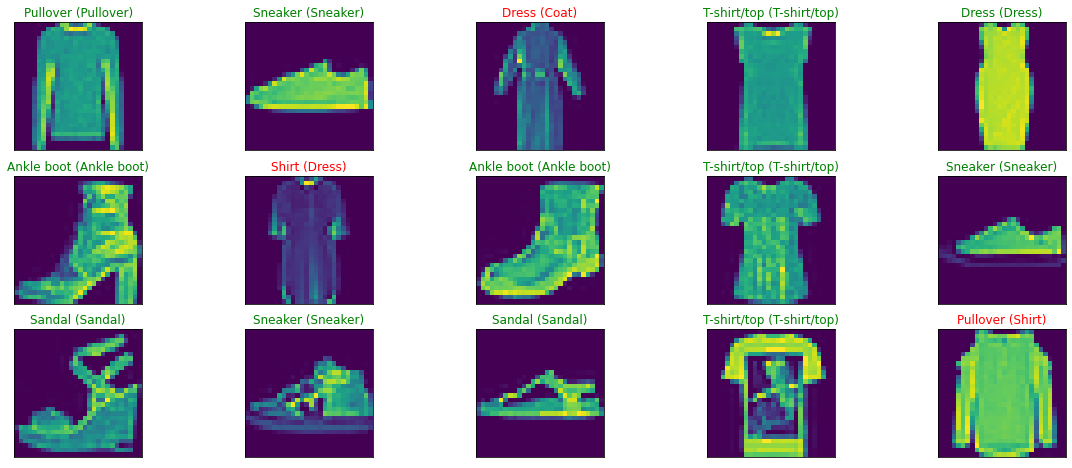

In [26]:
# Predict from trained model
predict_data(model3, x_test, y_test)


## WIth Kernel Modification(5,5)
Kernel Modification(5,5) means that we run a model with parameter set [(64,5),(32,5), (0.3,0.3)].

In [27]:
model4 = tf.keras.Sequential()

# With Kernel combination 5, 5
add_layers(model4, 64, 5, 2, 0.3, "first")
add_layers(model4, 32, 5, 2, 0.3, "second")

add_dense_layer(model4)

# Take a look at the model summary
model4.summary() 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        51232     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1568)             

#### Compile and Train

In [28]:
# Compile model
compile_model(model4)

checkpointer = ModelCheckpoint(filepath='model4.weights.best.hdf5', verbose = 1, save_best_only=True)

start_time = datetime.now()

# Train the model
train_model(model4, checkpointer, x_train, y_train, x_valid, y_valid)

# Duration of training
duration = datetime.now() - start_time
print("\n Duration:", duration)

Epoch 1/10
860/860 [==============================] - ETA: 0s - loss: 0.5572 - accuracy: 0.7974
Epoch 00001: val_loss improved from inf to 0.33005, saving model to model4.weights.best.hdf5
860/860 [==============================] - 141s 164ms/step - loss: 0.5572 - accuracy: 0.7974 - val_loss: 0.3300 - val_accuracy: 0.8834
Epoch 2/10
860/860 [==============================] - ETA: 0s - loss: 0.3634 - accuracy: 0.8683
Epoch 00002: val_loss improved from 0.33005 to 0.28149, saving model to model4.weights.best.hdf5
860/860 [==============================] - 141s 164ms/step - loss: 0.3634 - accuracy: 0.8683 - val_loss: 0.2815 - val_accuracy: 0.9022
Epoch 3/10
860/860 [==============================] - ETA: 0s - loss: 0.3216 - accuracy: 0.8825
Epoch 00003: val_loss improved from 0.28149 to 0.26037, saving model to model4.weights.best.hdf5
860/860 [==============================] - 139s 162ms/step - loss: 0.3216 - accuracy: 0.8825 - val_loss: 0.2604 - val_accuracy: 0.9032
Epoch 4/10
860/860 [

#### Test Accuracy

In [29]:
# Load the weights with the best validation accuracy
model4.load_weights('model4.weights.best.hdf5')

# Evaluate the model on test set
score = model4.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9115999937057495


#### Prediction

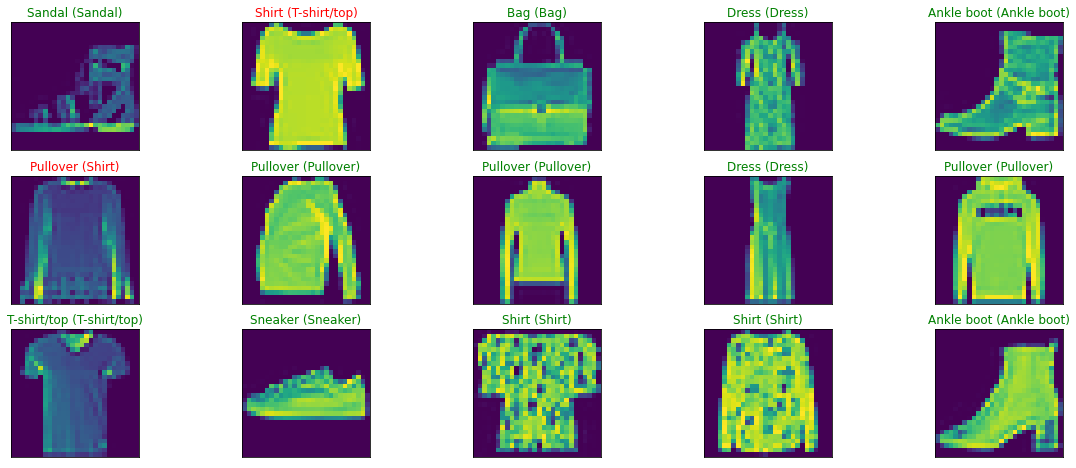

In [30]:
# Predict from trained model
predict_data(model4, x_test, y_test)


## WIth Dropout Probability Modification(0.35,0.25)
Dropout Modification(0.35,0.25) means that we run a model with parameter set [(64,2),(32,2), (0.35,0.25)].

In [31]:
model5 = tf.keras.Sequential()

# With dropout probability combination 0.35, 0.25
add_layers(model5, 64, 2, 2, 0.35, "first")
add_layers(model5, 32, 2, 2, 0.25, "second")

add_dense_layer(model5)

# Take a look at the model summary
model5.summary() 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1568)             

#### Compile and Train

In [32]:
# Compile model
compile_model(model5)

checkpointer = ModelCheckpoint(filepath='model5.weights.best.hdf5', verbose = 1, save_best_only=True)

start_time = datetime.now()

# Train the model
train_model(model5, checkpointer, x_train, y_train, x_valid, y_valid)

# Duration of training
duration = datetime.now() - start_time
print("\n Duration:", duration)

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.6030 - accuracy: 0.7807
Epoch 00001: val_loss improved from inf to 0.39491, saving model to model5.weights.best.hdf5
860/860 [==============================] - 76s 89ms/step - loss: 0.6030 - accuracy: 0.7807 - val_loss: 0.3949 - val_accuracy: 0.8600
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.4194 - accuracy: 0.8482
Epoch 00002: val_loss improved from 0.39491 to 0.33062, saving model to model5.weights.best.hdf5
860/860 [==============================] - 76s 89ms/step - loss: 0.4193 - accuracy: 0.8483 - val_loss: 0.3306 - val_accuracy: 0.8828
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.3739 - accuracy: 0.8629
Epoch 00003: val_loss improved from 0.33062 to 0.30318, saving model to model5.weights.best.hdf5
860/860 [==============================] - 75s 87ms/step - loss: 0.3739 - accuracy: 0.8628 - val_loss: 0.3032 - val_accuracy: 0.8892
Epoch 4/10
859/860 [======

#### Test Accuracy

In [33]:
# Load the weights with the best validation accuracy
model5.load_weights('model5.weights.best.hdf5')

# Evaluate the model on test set
score = model5.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9082000255584717


#### Prediction

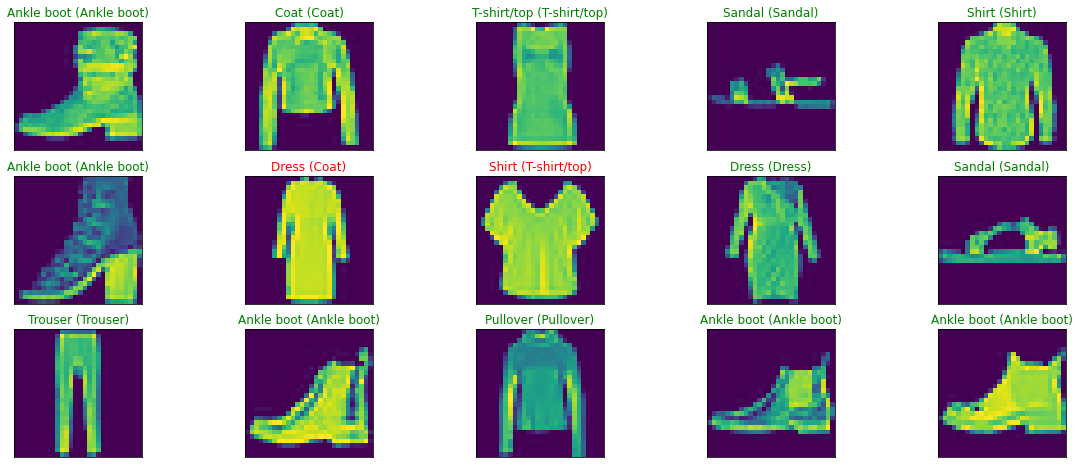

In [34]:
# Predict from trained model
predict_data(model5, x_test, y_test)



## WIth Dropout Probability Modification(0.2,0.2)
Dropout Modification(0.2,0.2) means that we run a model with parameter set [(64,2),(32,2), (0.2,0.2)].

In [35]:
model6 = tf.keras.Sequential()

# With dropout probability combination 0.2, 0.2
add_layers(model6, 64, 2, 2, 0.2, "first")
add_layers(model6, 32, 2, 2, 0.2, "second")

add_dense_layer(model6)

# Take a look at the model summary
model6.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1568)             

#### Compile and Train

In [36]:
# Compile model
compile_model(model6)

checkpointer = ModelCheckpoint(filepath='model6.weights.best.hdf5', verbose = 1, save_best_only=True)

start_time = datetime.now()

# Train the model
train_model(model6, checkpointer, x_train, y_train, x_valid, y_valid)

# Duration of training
duration = datetime.now() - start_time
print("\n Duration:", duration)

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.5896 - accuracy: 0.7823
Epoch 00001: val_loss improved from inf to 0.37232, saving model to model6.weights.best.hdf5
860/860 [==============================] - 76s 88ms/step - loss: 0.5895 - accuracy: 0.7824 - val_loss: 0.3723 - val_accuracy: 0.8686
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.4034 - accuracy: 0.8535
Epoch 00002: val_loss improved from 0.37232 to 0.31159, saving model to model6.weights.best.hdf5
860/860 [==============================] - 76s 89ms/step - loss: 0.4034 - accuracy: 0.8535 - val_loss: 0.3116 - val_accuracy: 0.8850
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.3606 - accuracy: 0.8691
Epoch 00003: val_loss improved from 0.31159 to 0.30141, saving model to model6.weights.best.hdf5
860/860 [==============================] - 76s 88ms/step - loss: 0.3606 - accuracy: 0.8691 - val_loss: 0.3014 - val_accuracy: 0.8890
Epoch 4/10
859/860 [======

#### Test Accuracy

In [37]:
# Load the weights with the best validation accuracy
model6.load_weights('model6.weights.best.hdf5')

# Evaluate the model on test set
score = model6.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9115999937057495


#### Prediction

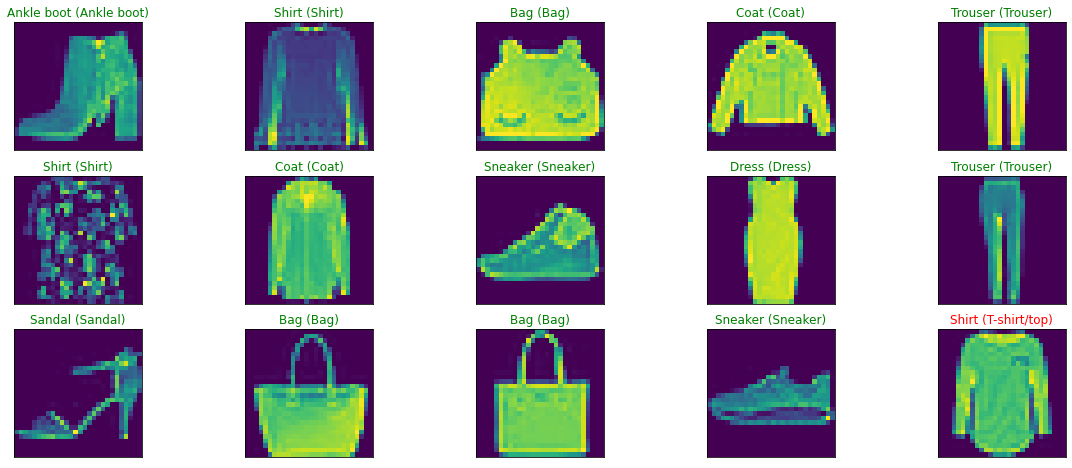

In [38]:
# Predict from trained model
predict_data(model6, x_test, y_test)


## With added extra layer:
An extra layeer is added with parameter set [(32,2),(16,2), (0.25,0.25)] to the base model architechture.

In [9]:
model7 = tf.keras.Sequential()

# Base model 
add_layers(model7, 64, 2, 2, 0.3, "first")
add_layers(model7, 32, 2, 2, 0.3, "second")

# added layer
add_layers(model7, 32, 2, 2, 0.25, "third")
add_layers(model7, 16, 2, 2, 0.25, "fourth")

add_dense_layer(model7)

# Take a look at the model summary
model7.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          4

#### Compile and Train

In [12]:
# Compile model
compile_model(model7)

checkpointer = ModelCheckpoint(filepath='model7.weights.best.hdf5', verbose = 1, save_best_only=True)

start_time = datetime.now()

# Train the model
train_model(model7, checkpointer, x_train, y_train, x_valid, y_valid)

# Duration of training
duration = datetime.now() - start_time
print("\n Duration:", duration)

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 1.2369 - accuracy: 0.5084
Epoch 00001: val_loss improved from inf to 0.75271, saving model to model7.weights.best.hdf5
860/860 [==============================] - 78s 91ms/step - loss: 1.2368 - accuracy: 0.5085 - val_loss: 0.7527 - val_accuracy: 0.7056
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.8505 - accuracy: 0.6645 ETA: 1s - loss: 0
Epoch 00002: val_loss improved from 0.75271 to 0.63586, saving model to model7.weights.best.hdf5
860/860 [==============================] - 75s 88ms/step - loss: 0.8504 - accuracy: 0.6645 - val_loss: 0.6359 - val_accuracy: 0.7470
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.7633 - accuracy: 0.7011
Epoch 00003: val_loss improved from 0.63586 to 0.56850, saving model to model7.weights.best.hdf5
860/860 [==============================] - 77s 89ms/step - loss: 0.7632 - accuracy: 0.7011 - val_loss: 0.5685 - val_accuracy: 0.7890
Epoch 4/

#### Test Accuracy

In [13]:
# Load the weights with the best validation accuracy
model7.load_weights('model7.weights.best.hdf5')

# Evaluate the model on test set
score = model7.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8464999794960022


#### Prediction

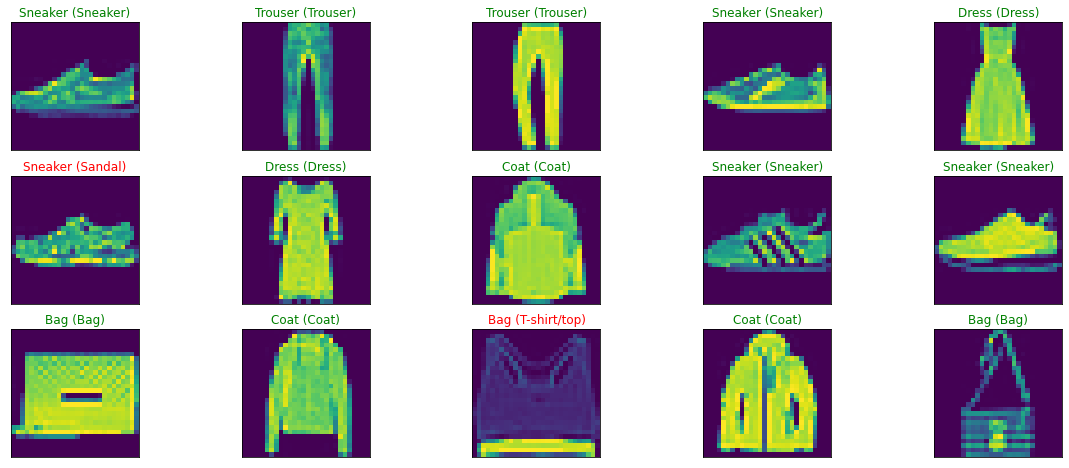

In [14]:
# Predict from trained model
predict_data(model7, x_test, y_test)

## 1st Experiment with combined changes
We create a  the model with parameter set [(32,4),(32,4), (0.25,0.25)] with pooling Kernel-size(2,2).

In [43]:
model8 = tf.keras.Sequential()

# Base model 
add_layers(model8, 32, 4, 2, 0.25, "first")
add_layers(model8, 32, 4, 2, 0.25, "second")

add_dense_layer(model8)

# Take a look at the model summary
model8.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 32)        544       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 32)        16416     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1568)             

#### Compile and Train

In [44]:
# Compile model
compile_model(model8)

checkpointer = ModelCheckpoint(filepath='model8.weights.best.hdf5', verbose = 1, save_best_only=True)

start_time = datetime.now()

# Train the model
train_model(model8, checkpointer, x_train, y_train, x_valid, y_valid)

# Duration of training
duration = datetime.now() - start_time
print("\n Duration:", duration)

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.5684 - accuracy: 0.7907
Epoch 00001: val_loss improved from inf to 0.35070, saving model to model8.weights.best.hdf5
860/860 [==============================] - 75s 88ms/step - loss: 0.5683 - accuracy: 0.7907 - val_loss: 0.3507 - val_accuracy: 0.8722
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.3757 - accuracy: 0.8636
Epoch 00002: val_loss improved from 0.35070 to 0.29056, saving model to model8.weights.best.hdf5
860/860 [==============================] - 74s 87ms/step - loss: 0.3757 - accuracy: 0.8636 - val_loss: 0.2906 - val_accuracy: 0.8942
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.3308 - accuracy: 0.8805
Epoch 00003: val_loss improved from 0.29056 to 0.26504, saving model to model8.weights.best.hdf5
860/860 [==============================] - 75s 88ms/step - loss: 0.3308 - accuracy: 0.8805 - val_loss: 0.2650 - val_accuracy: 0.9072
Epoch 4/10
859/860 [======

#### Test Accuracy

In [45]:
# Load the weights with the best validation accuracy
model8.load_weights('model8.weights.best.hdf5')

# Evaluate the model on test set
score = model8.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9157999753952026


#### Prediction

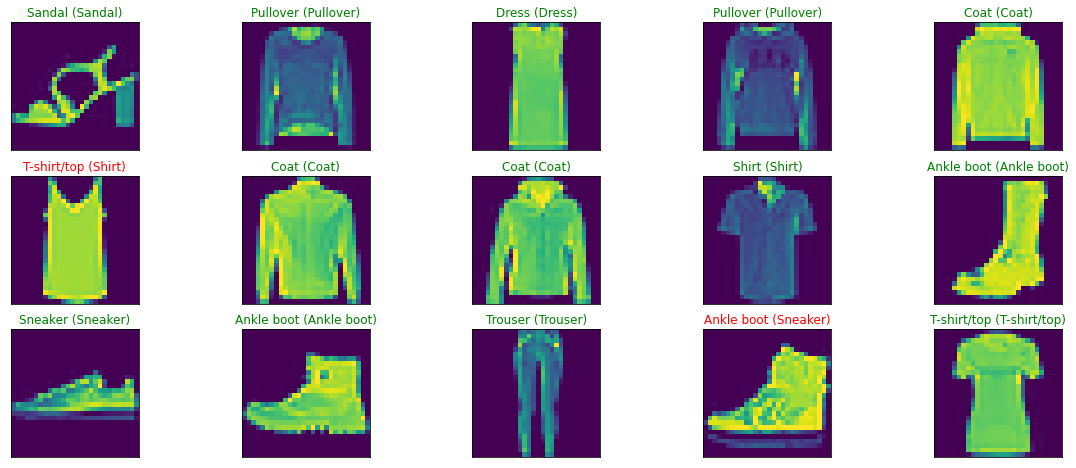

In [46]:
# Predict from trained model
predict_data(model8, x_test, y_test)

## 2nd Experiment with combined changes
We create a model with parameter set [(32,5),(32,5), (0.3,0.3)] with pooling Kernel-size(3,2).

In [47]:
model9 = tf.keras.Sequential()

# Base model 
add_layers(model9, 32, 5, 3, 0.3, "first")
add_layers(model9, 32, 5, 2, 0.3, "second")

add_dense_layer(model9)

# Take a look at the model summary
model9.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 9, 9, 32)          0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 9, 9, 32)          25632     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 512)              

#### Compile and Train

In [48]:
# Compile model
compile_model(model9)

checkpointer = ModelCheckpoint(filepath='model9.weights.best.hdf5', verbose = 1, save_best_only=True)

start_time = datetime.now()

# Train the model
train_model(model9, checkpointer, x_train, y_train, x_valid, y_valid)

# Duration of training
duration = datetime.now() - start_time
print("\n Duration:", duration)

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.6522 - accuracy: 0.7587
Epoch 00001: val_loss improved from inf to 0.37208, saving model to model9.weights.best.hdf5
860/860 [==============================] - 53s 62ms/step - loss: 0.6521 - accuracy: 0.7587 - val_loss: 0.3721 - val_accuracy: 0.8684
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.4334 - accuracy: 0.8412
Epoch 00002: val_loss improved from 0.37208 to 0.33240, saving model to model9.weights.best.hdf5
860/860 [==============================] - 51s 60ms/step - loss: 0.4334 - accuracy: 0.8412 - val_loss: 0.3324 - val_accuracy: 0.8780
Epoch 3/10
860/860 [==============================] - ETA: 0s - loss: 0.3845 - accuracy: 0.8601
Epoch 00003: val_loss improved from 0.33240 to 0.29490, saving model to model9.weights.best.hdf5
860/860 [==============================] - 52s 60ms/step - loss: 0.3845 - accuracy: 0.8601 - val_loss: 0.2949 - val_accuracy: 0.8922
Epoch 4/10
859/860 [======

#### Test Accuracy

In [49]:
# Load the weights with the best validation accuracy
model9.load_weights('model9.weights.best.hdf5')

# Evaluate the model on test set
score = model9.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.906000018119812


#### Prediction

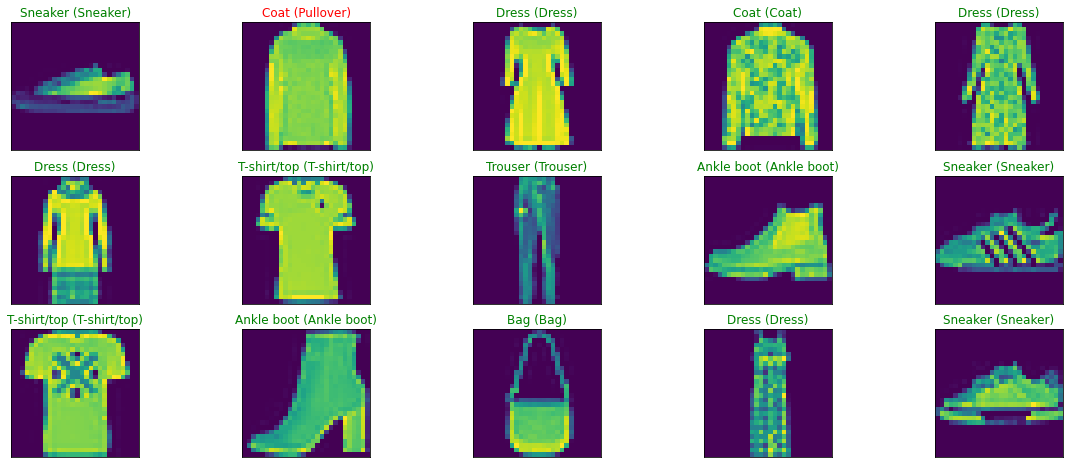

In [50]:
# Predict from trained model
predict_data(model9, x_test, y_test)

## 3rd Experiment with combined changes
We create a model with parameter set [(64,4),(64,2), (0.4,0.3)] with pooling Kernel-size(4,2).

In [51]:
model10 = tf.keras.Sequential()

# Base model 
add_layers(model10, 64, 4, 4, 0.4, "first")
add_layers(model10, 64, 2, 2, 0.3, "second")

add_dense_layer(model10)

# Take a look at the model summary
model10.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 64)        1088      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 7, 7, 64)          16448     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 576)             

#### Compile and Train

In [52]:
# Compile model
compile_model(model10)

checkpointer = ModelCheckpoint(filepath='model10.weights.best.hdf5', verbose = 1, save_best_only=True)

start_time = datetime.now()

# Train the model
train_model(model10, checkpointer, x_train, y_train, x_valid, y_valid)

# Duration of training
duration = datetime.now() - start_time
print("\n Duration:", duration)

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.7318 - accuracy: 0.7273
Epoch 00001: val_loss improved from inf to 0.44967, saving model to model10.weights.best.hdf5
860/860 [==============================] - 43s 50ms/step - loss: 0.7318 - accuracy: 0.7273 - val_loss: 0.4497 - val_accuracy: 0.8374
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.4922 - accuracy: 0.8178
Epoch 00002: val_loss improved from 0.44967 to 0.34450, saving model to model10.weights.best.hdf5
860/860 [==============================] - 43s 50ms/step - loss: 0.4922 - accuracy: 0.8178 - val_loss: 0.3445 - val_accuracy: 0.8760
Epoch 3/10
860/860 [==============================] - ETA: 0s - loss: 0.4241 - accuracy: 0.8444
Epoch 00003: val_loss improved from 0.34450 to 0.32053, saving model to model10.weights.best.hdf5
860/860 [==============================] - 46s 54ms/step - loss: 0.4241 - accuracy: 0.8444 - val_loss: 0.3205 - val_accuracy: 0.8858
Epoch 4/10
859/860 [===

#### Test Accuracy

In [53]:
# Load the weights with the best validation accuracy
model10.load_weights('model10.weights.best.hdf5')

# Evaluate the model on test set
score = model10.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8999999761581421


#### Prediction

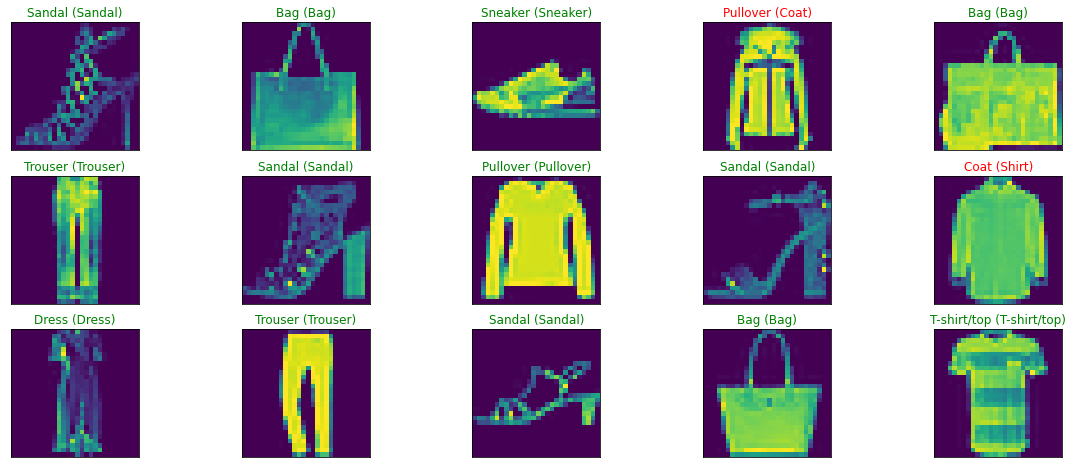

In [54]:
# Predict from trained model
predict_data(model10, x_test, y_test)

## 4th Experiment with combined changes
We create a model with parameter set [(64,5),(64,5), (0.25,0.3)] with pooling Kernel-size(3,3).

In [55]:
model11 = tf.keras.Sequential()

# Base model 
add_layers(model11, 64, 5, 3, 0.25, "first")
add_layers(model11, 64, 5, 3, 0.3, "second")

add_dense_layer(model11)

# Take a look at the model summary
model11.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 9, 9, 64)          102464    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 576)             

#### Compile and Train

In [56]:
# Compile model
compile_model(model11)

checkpointer = ModelCheckpoint(filepath='model11.weights.best.hdf5', verbose = 1, save_best_only=True)

start_time = datetime.now()

# Train the model
train_model(model11, checkpointer, x_train, y_train, x_valid, y_valid)

# Duration of training
duration = datetime.now() - start_time
print("\n Duration:", duration)

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.6225 - accuracy: 0.7732
Epoch 00001: val_loss improved from inf to 0.35017, saving model to model11.weights.best.hdf5
860/860 [==============================] - 93s 108ms/step - loss: 0.6226 - accuracy: 0.7732 - val_loss: 0.3502 - val_accuracy: 0.8762
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.3841 - accuracy: 0.8615
Epoch 00002: val_loss improved from 0.35017 to 0.29958, saving model to model11.weights.best.hdf5
860/860 [==============================] - 96s 112ms/step - loss: 0.3841 - accuracy: 0.8615 - val_loss: 0.2996 - val_accuracy: 0.8878
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.3374 - accuracy: 0.8767
Epoch 00003: val_loss improved from 0.29958 to 0.26702, saving model to model11.weights.best.hdf5
860/860 [==============================] - 92s 107ms/step - loss: 0.3374 - accuracy: 0.8767 - val_loss: 0.2670 - val_accuracy: 0.9020
Epoch 4/10
860/860 [

#### Test Accuracy

In [57]:
# Load the weights with the best validation accuracy
model11.load_weights('model11.weights.best.hdf5')

# Evaluate the model on test set
score = model11.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9125000238418579


#### Prediction

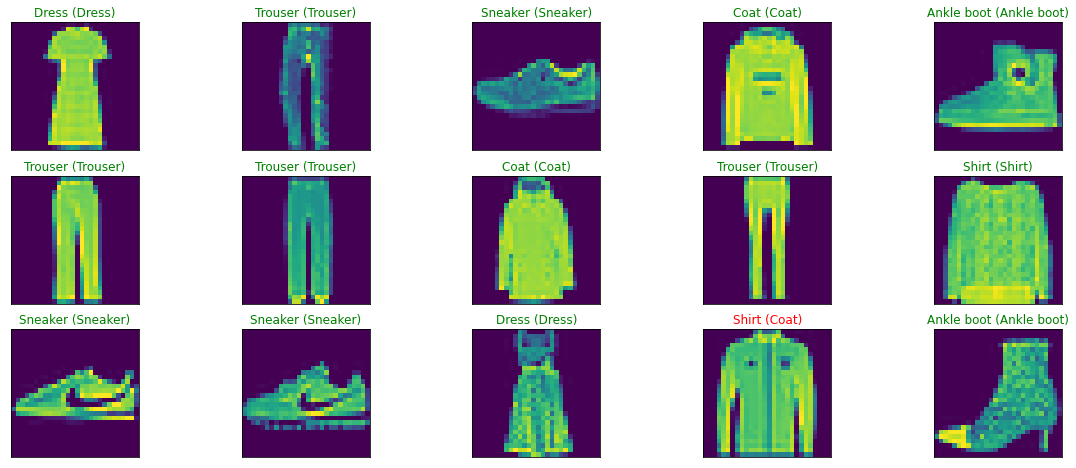

In [58]:
# Predict from trained model
predict_data(model11, x_test, y_test)

## Table to compare differnet architectures
Below is the table which shows the results with the first column describing the architecture, the second column the predictive accuracy of the model on the data and third column with the execution time to train each model.

As stated earlier, we refer to a model using the parameter set [(64,2),(32,2), (0.3,0.3)], 
which refers to 
[(convolution layer1 filters, convolution layer1 kernel size),
(convolution layer2 filters, convolution layer2 kernel size),
(convolution layer1 Dropout-probability, convolution layer2 Dropout-probability)].
Thus [(64,2),(32,2), (0.3,0.3)] is the parameter set for the baseline model.


| Model Architecture | Test Accuracy(%) | Training Duration (HH:MM:SS.ss) |
| :- | -: | :-: |
| Base Model, Parameter set [(64,2),(32,2), (0.3,0.3)] | 91:23 | 00:13:22.37 |
| Model1, Parameter set [(32,2),(32,2), (0.3,0.3)] | 90.33 | 00:07:53.19 |
| Model2, Parameter set [(32,2),(16,2), (0.3,0.3)] | 89.66 | 00:06:32.22 |
| Model3, Parameter set [(64,3),(32,3), (0.3,0.3)] | 91.26 | 00:16:25.05 |
| Model4, Parameter set [(64,5),(32,5), (0.3,0.3)] | 91.16 | 00:23:13.25 |
| Model5, Parameter set [(64,2),(32,2), (0.35,0.25)] | 90.82 | 00:12:45.33 |
| Model6, Parameter set [(64,2),(32,2), (0.2,0.2)] | 91.16 | 00:12:46.15 |
| Model7, Extra layer with Parameter set [(32,2),(16,2), (0.25,0.25)] | 84.65 | 00:12:42.41 |
| Model8, Parameter set [(32,4),(32,4), (0.25,0.25)], Pooling Kernel-size(2,2) | 91.58 | 00:12:35.61 |
| Model9, Parameter set [(32,5),(32,5), (0.3,0.3)], Pooling Kernel-size(3,2) | 90.6 | 00:08:41.87 |
| Model10, Parameter set [(64,4),(64,2), (0.4,0.3)],  Pooling Kernel-size(4,2) | 89.99 | 00:07:31.39 |
| Model11, Parameter set [(64,5),(64,5), (0.25,0.3)], Pooling Kernel-size(3,3) | 91.25 | 00:15:21:79 |



## Report

This is the summary report of the experiment executed above, which summarizes the impact of different architectural changes.

### Impact of number of filters
From the table shown above we can see if the convolution layer filter is reduced ( in Model1 from 64 to 32 for convolution layer 1, in Model2 from 64 to 32 in convolution layer-1 and from 32 to 16 from convolution layer-2) there is small reduction in  test accuracy for Model1 90.33% and for Model2 89.66% compared to base model 91.23%. The training duration of the model reduces along with filter reduction.
As we can see the number of trainable parameters in model reduces with the reduction of the filter and thus the model becomes less complex and takes less time to train. 

### Impact of Kernel size
Base on the above table we can see as the convolution layer kernel size increases( for Model3 3 * 3 and Model4 5 * 5 compared to base model 2 * 2) the test accuracy does not significantly change but the training duration increases. 
We can say using higher kernal size increases dimentions in the model and thus number of trainable parameter increases and traing duration increases. Model4 with parameter set [(64,5),(32,5), (0.3,0.3)] has the highest trainable parameters thus highest training duration 23min 13.25 sec.

### Impact of dropout-probability
We can see there is no significant difference in the training duration or testing accuracy, while we change the dropout-probability in Model5 and Model6.

### Impact of number of layers
In this experiement we can see that the addition of the layer has reduced the test accuracy (Model7 84.65%).
Here adding an extra layer trains the model better with training data, which is overfitting the model and produces less accuracy with test data. This is the lowest test accuracy among all the models we have executed and significantly because of the added extra layer. 

### Impact of combining multiple changes

In Model9 compared to Model8 increased Pooling Kernel-size reduces the dimentions hense we can see less training time in Model9. Increase in dropout probability in Model9 compared to Model8 reduces the test accuracy.
Model10 also has reduced dimentions compared to Model11 because of Pooling Kernal-size.
Increase in dropout probability in Model10 compared to Model11 reduces the test accuracy.
Dropout regularizes the networks by adding noise to the output feature maps of each layer.

The Highest test accuracy 91.58% can be seen in Model8 with Parameter set [(32,5),(32,5), (0.3,0.3)] and Pooling Kernel-size(3,2). This suggests that a trade off among the parameters is expected to give best results.



## References

(1) Fergus,  R.,  Zeiler,  M.D.:  Visualizing  and  Understanding  Convolutional  Networks,  arXiv, 2013.
https://link.springer.com/content/pdf/10.1007/978-3-319-10590-1_53.pdf

(2) Owais, M.K., Samad, D. : Convolutional Neural Networks and Impact of Filter Size, 2020. https://www.researchgate.net/publication/340516673_Convolution_Neural_Networks_and_Impact_of_Filter_Sizes_on_Image_Classification

(3) Szegedy,  C.,  Vanhoucke,  V.,  Ioffe,  S.,  Shlens,  J.,  Wojna,  Z.:  Rethinking  the  Inception Architecture for Computer Vision, arXiv, 2015. https://doi.org/10.1109/CVPR.2016.308

(4) Sungheon Park, N. Kwak : Analysis on the Dropout Effect in Convolutional Neural Networks, ACCV, 2016
https://www.semanticscholar.org/paper/Analysis-on-the-Dropout-Effect-in-Convolutional-Park-Kwak/38367ae9f0f70ab16d4914e9cd6d24872eca67bc

(5) Islam, R., Saha, O., Osman, S.: Inside of Convolution Filters and Effects of These Filters in Brain MRI Image Classification, International Conference on Innovation in Engineering and Technology (ICIET), Dhaka, 2018. https://doi.org/10.1109/CIET.2018.8660801

